<a href="https://colab.research.google.com/github/erginozcan1993/erginozcan1993/blob/main/Global_AI_Hub_Akbank_Makine_%C3%96%C4%9Frenmesi_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Global AI Hub Makine Öğrenme Bootcampi Projesi
#### Melbourne Evleri'nin Uçtan Uca Fiyat Tahmini

Bu proje ödevimizde Melbourne'daki evlerinin verilerini karşılaştırarak bir sonraki ev fiyatını tahmin etmeye çalışacağız. Dilerseniz ilk önce gerekli kütüphanelerimizi çalıştıracağız.

In [139]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Şimdi gerekli verimizi çalıştırıyoruz. Bunun için ilk olarak Less bölümünü deneyeceğiz.

In [25]:
from google.colab import files
uploaded = files.upload()

Saving MELBOURNE_HOUSE_PRICES_LESS.csv to MELBOURNE_HOUSE_PRICES_LESS (1).csv


In [28]:
import io
less = pd.read_csv(io.BytesIO(uploaded['MELBOURNE_HOUSE_PRICES_LESS (1).csv']))

In [29]:
less.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.00,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.00,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.00,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.00,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.00,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.00,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.00,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.50,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.00,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.40,Moonee Valley City Council


In [30]:
print(f'Shape     : {less.shape}\n'
      f'Size      : {less.size}\n'
      f'Dimension : {less.ndim}')

Shape     : (63023, 13)
Size      : 819299
Dimension : 2


Less bölümünü çalıştırdık. Şimdi tam bölümünü çalıştıracağız.

In [ ]:
from google.colab import files
uploaded2 = files.upload()

In [98]:
full = pd.read_csv(io.BytesIO(uploaded2['Melbourne_housing_FULL.csv']))

In [99]:
full.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [100]:
print(f'Shape     : {full.shape}\n'
      f'Size      : {full.size}\n'
      f'Dimension : {full.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


Bu vesileyle ilk bakışımız belli oluyor. Less tablosunda sadece fiyatlar, odalar ve nerede olduklarına bağlı olarak değişiklik gösteriyor. Bu yüzden less tablosu bizim için pek işe yarayacak tablo değil.

Full tablosunda ise odalar, tipler, metodlar, uzaklık, yatak odaları gibi detaylar göze çarpıyor. O daha işe yarar olduğu için o tabloyu kullanacağım. Ancak ilk olarak biraz tabloyu inceleyeceğim. Ancak daha sonraki bölümlerde sıkıntı yaratmaması adına belli değişiklik yapacağım.

In [101]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

In [102]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Burada hangilerin kategorik, hangilerin sayısal değişken olduğu net bir şekilde görülüyor. Ancak ilk bakış yanıltıcı olabilir. Bu yüzden, bir de açıklamasını talep edip transpozu alacağım.

In [103]:
full.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34856.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.00,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26640.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26631.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26129.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13742.00,160.26,401.27,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15551.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


Bu vesileyle tablo net bir şekilde açıklanmış görülüyor. Elimizde odalar, fiyatlar, posta kodları, yatak odaları, banyo, araç, arazi, yapım yılı, koordinat ve property sayısı verilmekte.

Bunlardan posta kodları, koordinatlar ve property sayısının alakasını bulamadım. O yüzden onları kaldıracağım. Ancak özellikle bu projede fiyat sorulduğu için fiyatı referans alacağım. Etkin değişkenler ise sayısal değişkenler içerisinde oda, banyo, yatak odası, araç, arsa ve arazi olarak gördüm.

Kategorik değişkenlerde ise ev türü, satış metodu ve bölge ismi ağır basıyor. Ayrıca mahalle de bu değişkenlere dahil edebiliriz. Ancak kimi sattığı şu anda beni ilgilendirmiyor. Ancak ne olur ne olmaz diyerek ilk olarak full tablosunun bir kopyasını alacağım. Ardından bu olaylara değişiklik yapacağım.

In [104]:
full_copy = full

Öncelikle ne kadar eksik veri olduğunu öğrenmek istiyorum. Bu yüzden isna fonksiyonuyla kullanıp bunları toplayacağım.

In [105]:
full_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Öncelikli olarak fiyat bölümünde boşluklar var. Ancak eğer hepsinin birden ortalamasını alırsak bazı evlerini gereğinden fazla değer verebilir, bazı evlere de az değer verebiliriz. Bu yüzden oda ve tip olarak kırılımlara ayırmamız gerekecek.

Tip kategorik değişken olduğundan One Hot Encoder uygulamamız gerekecek. Oda sayısal değişken olduğundan bunu uygulamamıza gerek yok. Ancak daha öncesinde verileri görselleştirmek istiyorum. Ne olduğunu öğrenmek konusunda ihtiyacım olacak.

<ipython-input-106-3046630e5e4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = full_copy.corr()


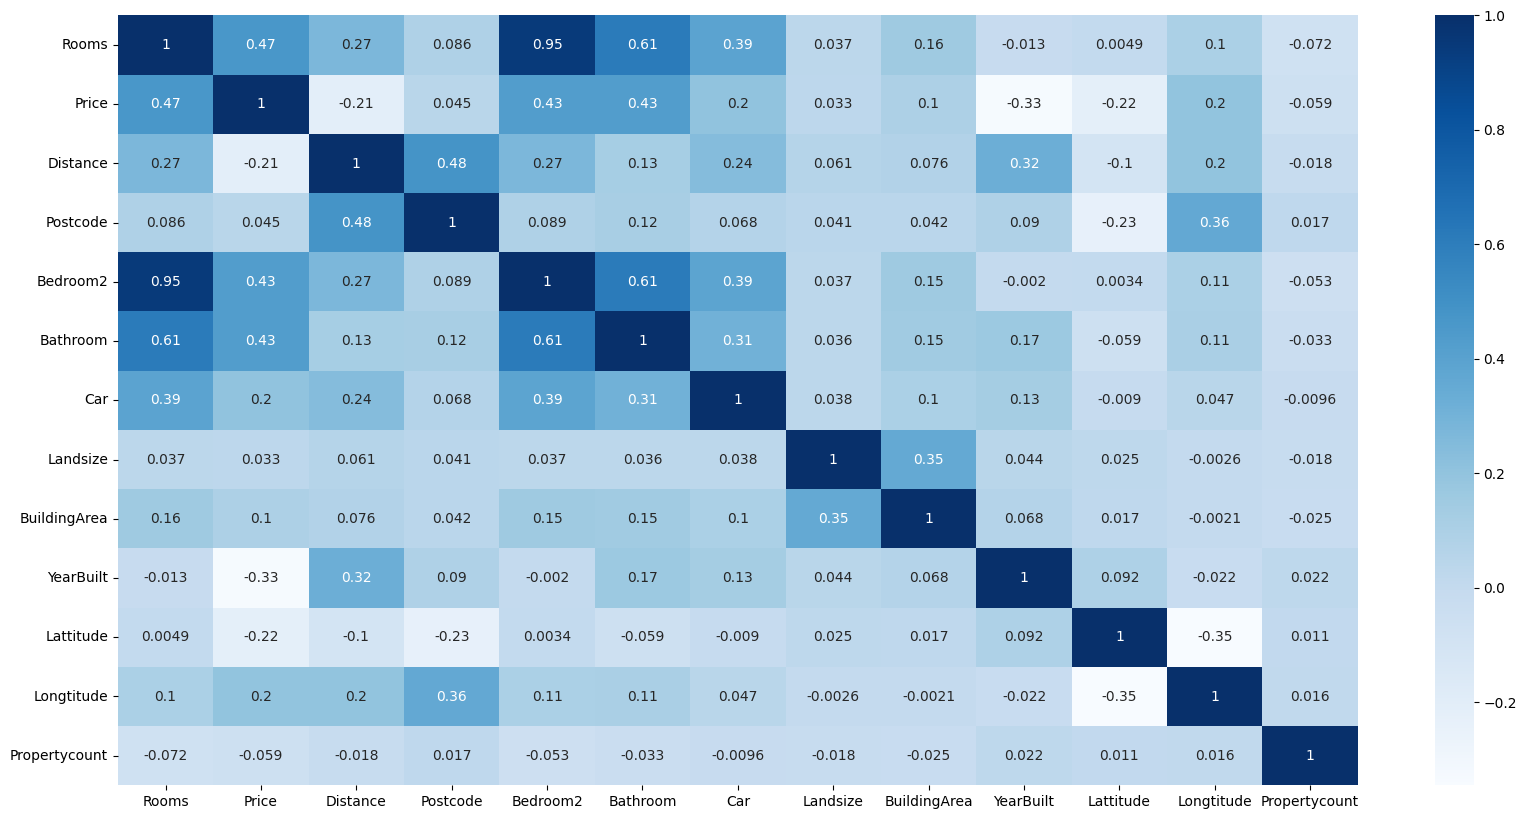

In [106]:
corr = full_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

Bu vesileyle hangilerinin alakalı, hangilerinin alakasız olduğunu tarama fırsatım oldu. Oda ile yatak odasının alakası neredeyse bire yakın. Ancak bu durum overfittinge sebebiyet verebilir. Bu yüzden 0.4 ile 0.7 arasındaki ilişkileri dikkate alacağım.

Diğer yandan hem outlier da bulunuyor. Dolayısıyla ilk olarak orayı deneyeceğim. İlk olarak hangilerin çizginin dışında olduklarına bakacağım.

Rooms               Axes(0.125,0.712609;0.168478x0.167391)
Price            Axes(0.327174,0.712609;0.168478x0.167391)
Distance         Axes(0.529348,0.712609;0.168478x0.167391)
Postcode         Axes(0.731522,0.712609;0.168478x0.167391)
Bedroom2            Axes(0.125,0.511739;0.168478x0.167391)
Bathroom         Axes(0.327174,0.511739;0.168478x0.167391)
Car              Axes(0.529348,0.511739;0.168478x0.167391)
Landsize         Axes(0.731522,0.511739;0.168478x0.167391)
BuildingArea         Axes(0.125,0.31087;0.168478x0.167391)
YearBuilt         Axes(0.327174,0.31087;0.168478x0.167391)
Lattitude         Axes(0.529348,0.31087;0.168478x0.167391)
Longtitude        Axes(0.731522,0.31087;0.168478x0.167391)
Propertycount           Axes(0.125,0.11;0.168478x0.167391)
dtype: object

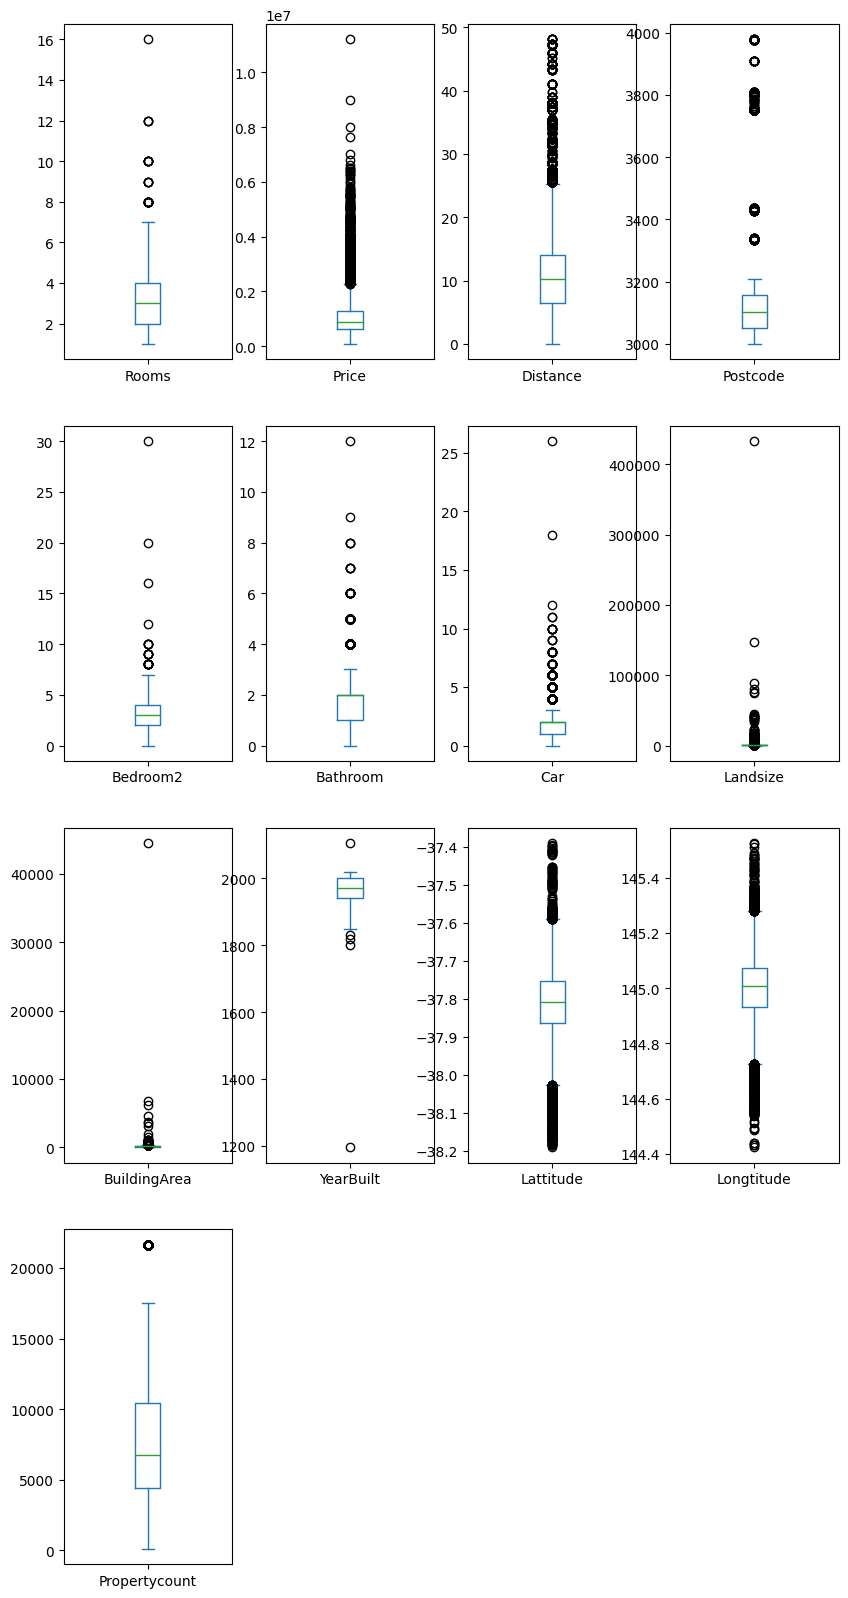

In [107]:
full_copy.plot(kind ="box", subplots = True , figsize = (10,20), layout = (4,4))

Bu vesileyle belli başlı problemlerin olduğunu görüyorum. O zaman Z Skorunu almam gerekecek. İlk olarak değişkenlerini ayıracağım. Ardından dağıtım işlemlerini gördükten sonra uç kısımlarını temizlemeye çalışacağım.

In [108]:
kategorik_degisken = ['Suburb', 'Address', 'Type', 'Method', 'Regionname']
sayisal_degisken = ['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']

In [109]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(full_copy[variable], bins = 25)
    plt.xlabel(variable)
    plt.title("{} disribution with hist".format(variable))
    plt.show()

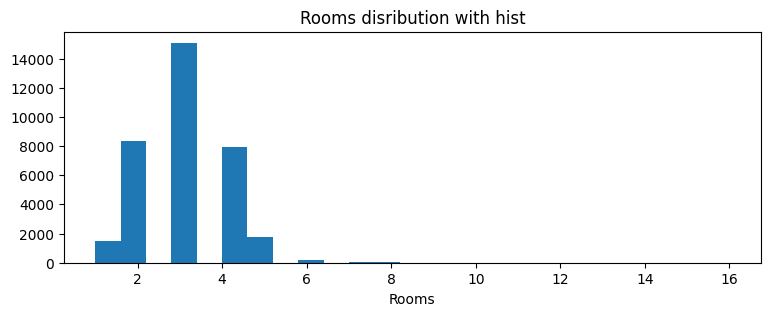

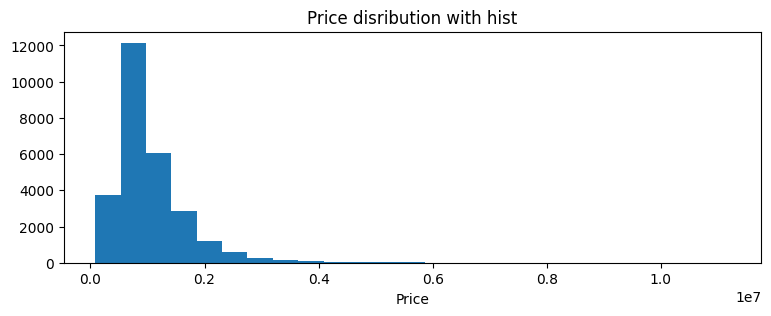

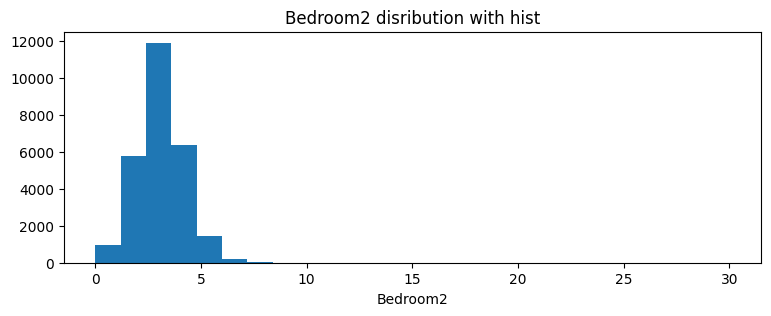

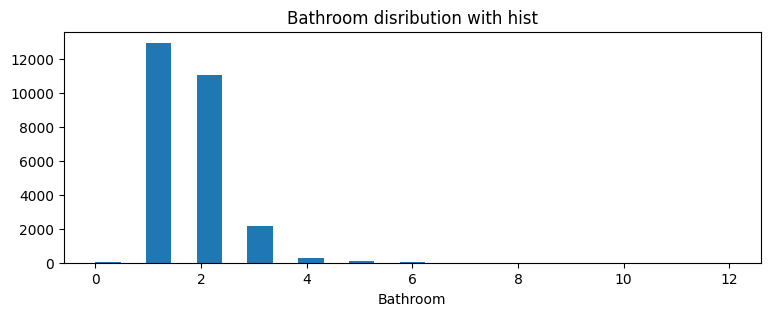

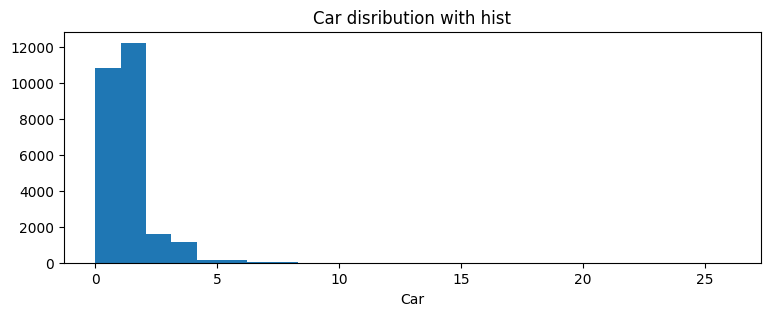

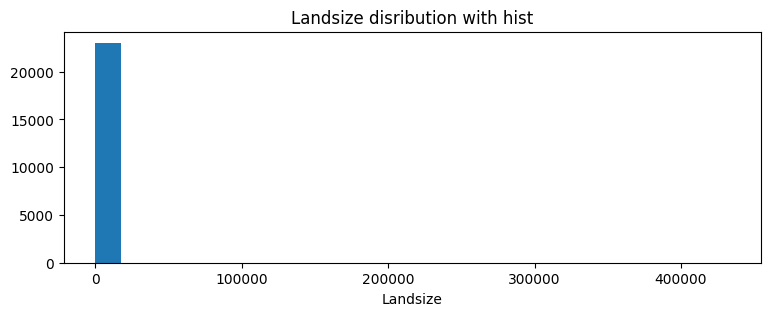

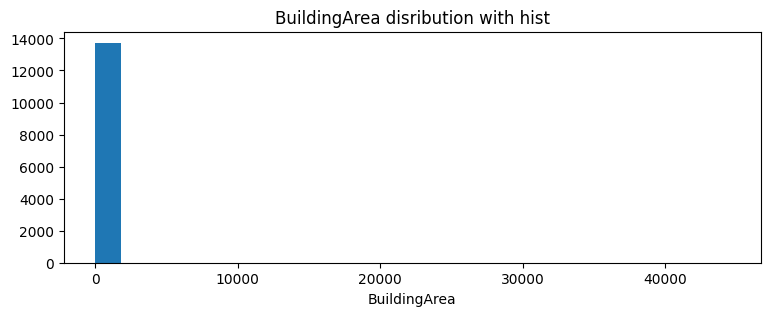

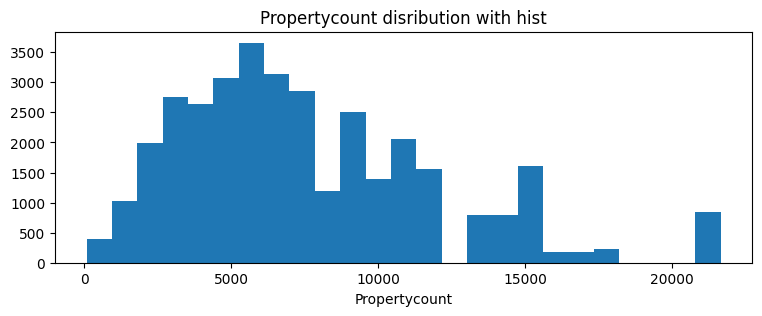

In [110]:
for n in sayisal_degisken:
    plot_hist(n)

In [111]:
Q1 = full_copy['Rooms'].quantile(.01)
Q3 = full_copy['Rooms'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

full_copy = full_copy[full_copy['Rooms'].between(q1, q3)]
full_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [112]:
Q1 = full_copy['Bathroom'].quantile(.01)
Q3 = full_copy['Bathroom'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

full_copy = full_copy[full_copy['Bathroom'].between(q1, q3)]
full_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [113]:
Q1 = full_copy['Car'].quantile(.01)
Q3 = full_copy['Car'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

full_copy = full_copy[full_copy['Car'].between(q1, q3)]
full_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


Şimdi outlierlarını gözden geçiriyorum.

Rooms               Axes(0.125,0.712609;0.168478x0.167391)
Price            Axes(0.327174,0.712609;0.168478x0.167391)
Distance         Axes(0.529348,0.712609;0.168478x0.167391)
Postcode         Axes(0.731522,0.712609;0.168478x0.167391)
Bedroom2            Axes(0.125,0.511739;0.168478x0.167391)
Bathroom         Axes(0.327174,0.511739;0.168478x0.167391)
Car              Axes(0.529348,0.511739;0.168478x0.167391)
Landsize         Axes(0.731522,0.511739;0.168478x0.167391)
BuildingArea         Axes(0.125,0.31087;0.168478x0.167391)
YearBuilt         Axes(0.327174,0.31087;0.168478x0.167391)
Lattitude         Axes(0.529348,0.31087;0.168478x0.167391)
Longtitude        Axes(0.731522,0.31087;0.168478x0.167391)
Propertycount           Axes(0.125,0.11;0.168478x0.167391)
dtype: object

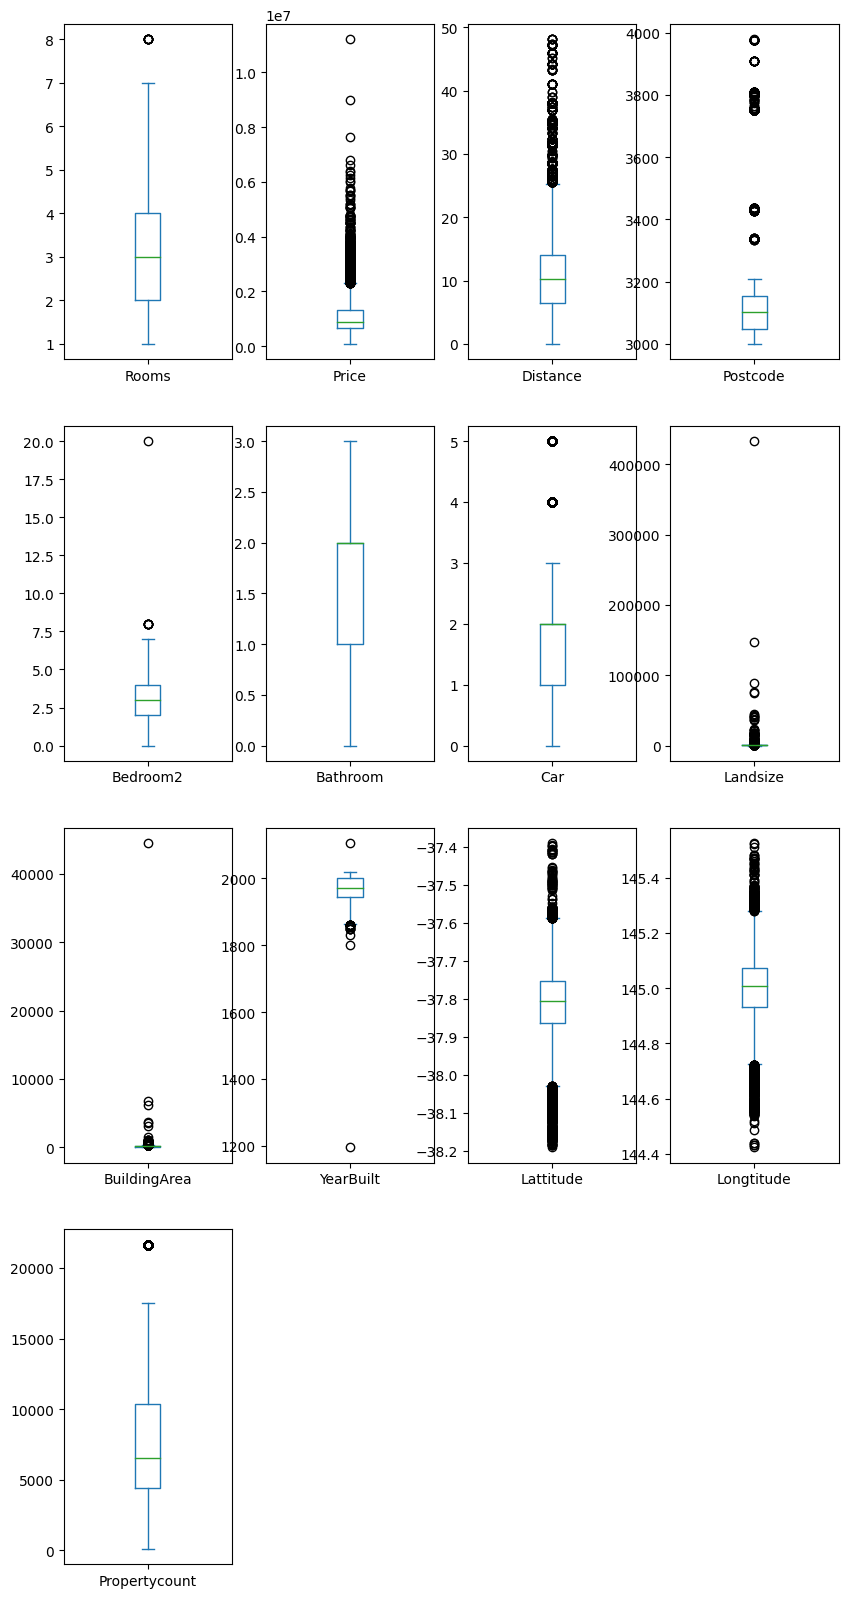

In [114]:
full_copy.plot(kind ="box", subplots = True , figsize = (10,20), layout = (4,4))

Büyük kısmı gitmiş görünüyor. Ancak bazı yerler açık kalmış. Onları da temizledikten sonra tekrar deneyeceğim.

In [115]:
Q1 = full_copy['Bedroom2'].quantile(.01)
Q3 = full_copy['Bedroom2'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

full_copy = full_copy[full_copy['Bedroom2'].between(q1, q3)]
full_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [116]:
Q1 = full_copy['Landsize'].quantile(.01)
Q3 = full_copy['Landsize'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

full_copy = full_copy[full_copy['Landsize'].between(q1, q3)]
full_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


Rooms               Axes(0.125,0.712609;0.168478x0.167391)
Price            Axes(0.327174,0.712609;0.168478x0.167391)
Distance         Axes(0.529348,0.712609;0.168478x0.167391)
Postcode         Axes(0.731522,0.712609;0.168478x0.167391)
Bedroom2            Axes(0.125,0.511739;0.168478x0.167391)
Bathroom         Axes(0.327174,0.511739;0.168478x0.167391)
Car              Axes(0.529348,0.511739;0.168478x0.167391)
Landsize         Axes(0.731522,0.511739;0.168478x0.167391)
BuildingArea         Axes(0.125,0.31087;0.168478x0.167391)
YearBuilt         Axes(0.327174,0.31087;0.168478x0.167391)
Lattitude         Axes(0.529348,0.31087;0.168478x0.167391)
Longtitude        Axes(0.731522,0.31087;0.168478x0.167391)
Propertycount           Axes(0.125,0.11;0.168478x0.167391)
dtype: object

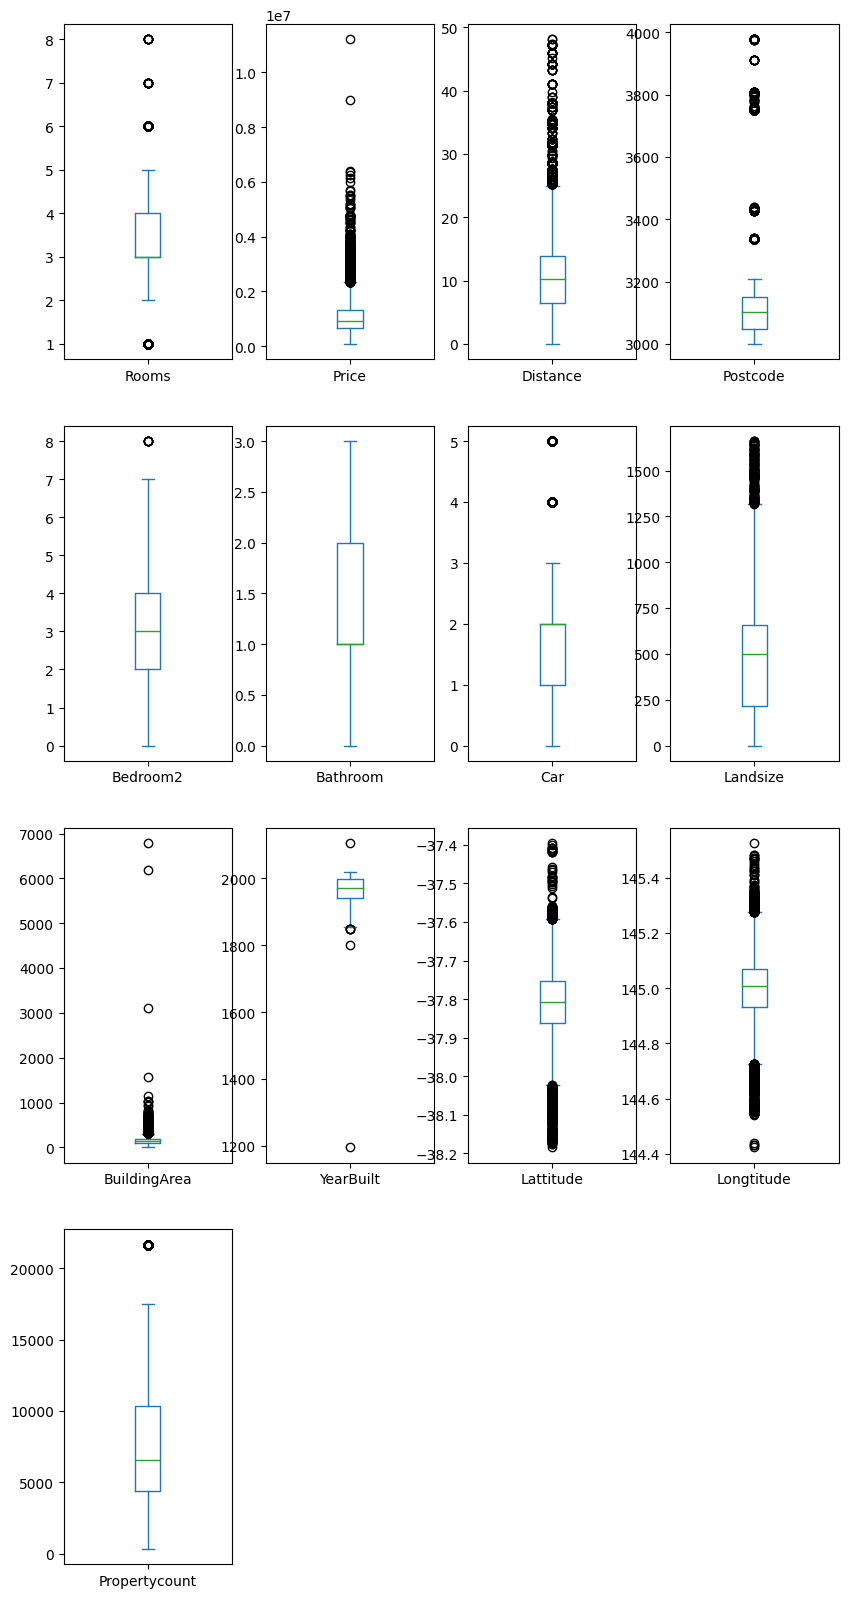

In [117]:
full_copy.plot(kind ="box", subplots = True , figsize = (10,20), layout = (4,4))

Sorun çözülmüş görünüyor. Şimdi istatistiklere tekrardan bakacağım.

<Axes: xlabel='Rooms', ylabel='Count'>

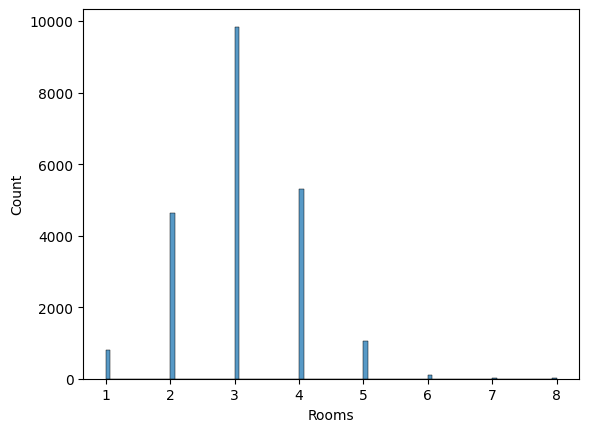

In [125]:
sns.histplot(x=full_copy['Rooms'])

<Axes: xlabel='Price', ylabel='Count'>

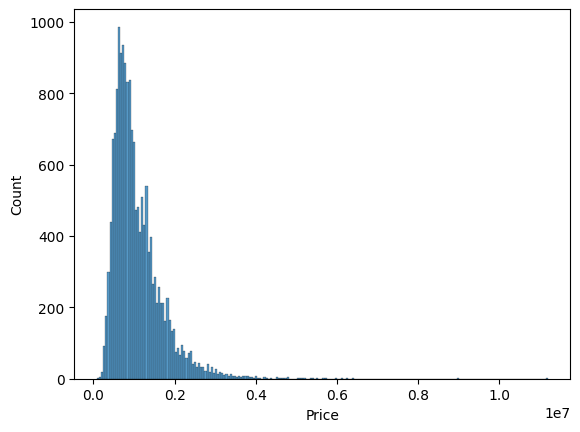

In [126]:
sns.histplot(x=full_copy['Price'])

<Axes: xlabel='Distance', ylabel='Count'>

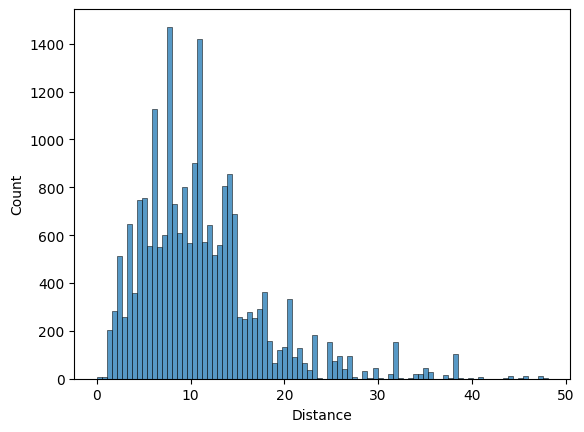

In [127]:
sns.histplot(x=full_copy['Distance'])

Bir de bunları karşılaştıracağım.

<Axes: xlabel='Price', ylabel='Distance'>

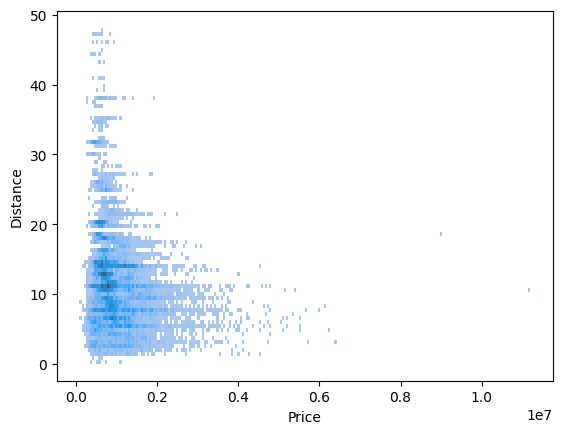

In [121]:
sns.histplot(x=full_copy['Price'],y=full_copy['Distance'])

<Axes: xlabel='Price', ylabel='Rooms'>

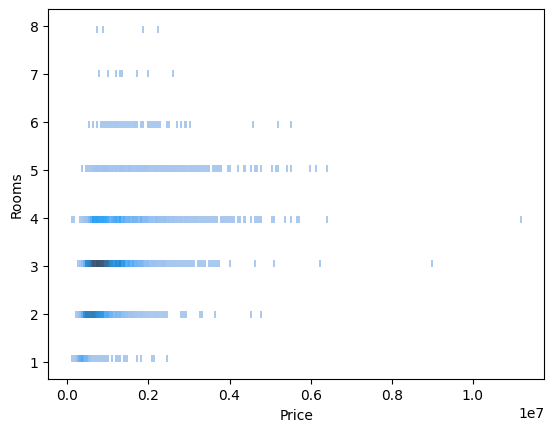

In [122]:
sns.histplot(x=full_copy['Price'],y=full_copy['Rooms'])

<ipython-input-123-3046630e5e4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = full_copy.corr()


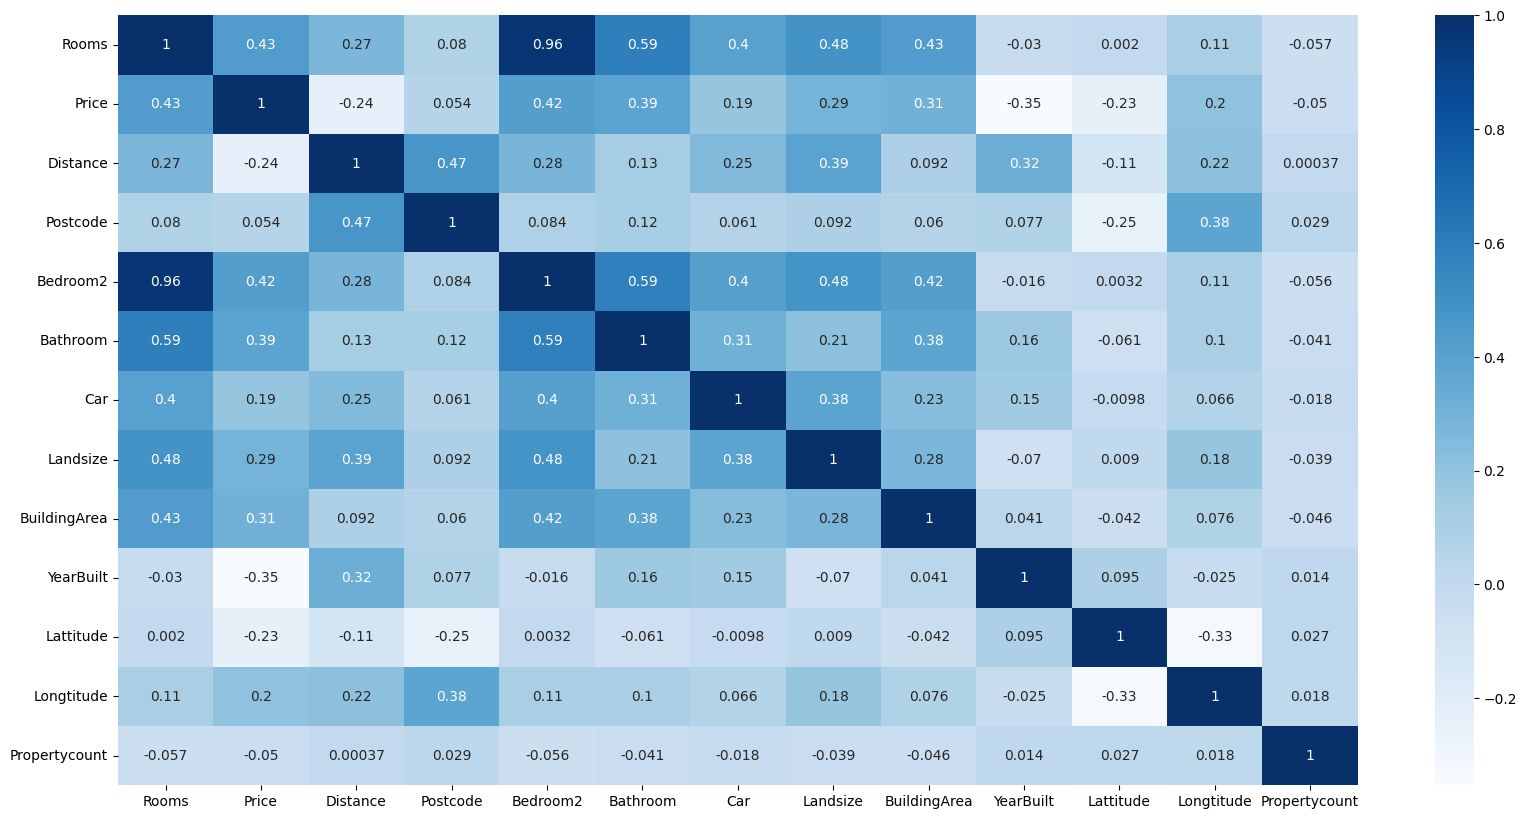

In [123]:
corr = full_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

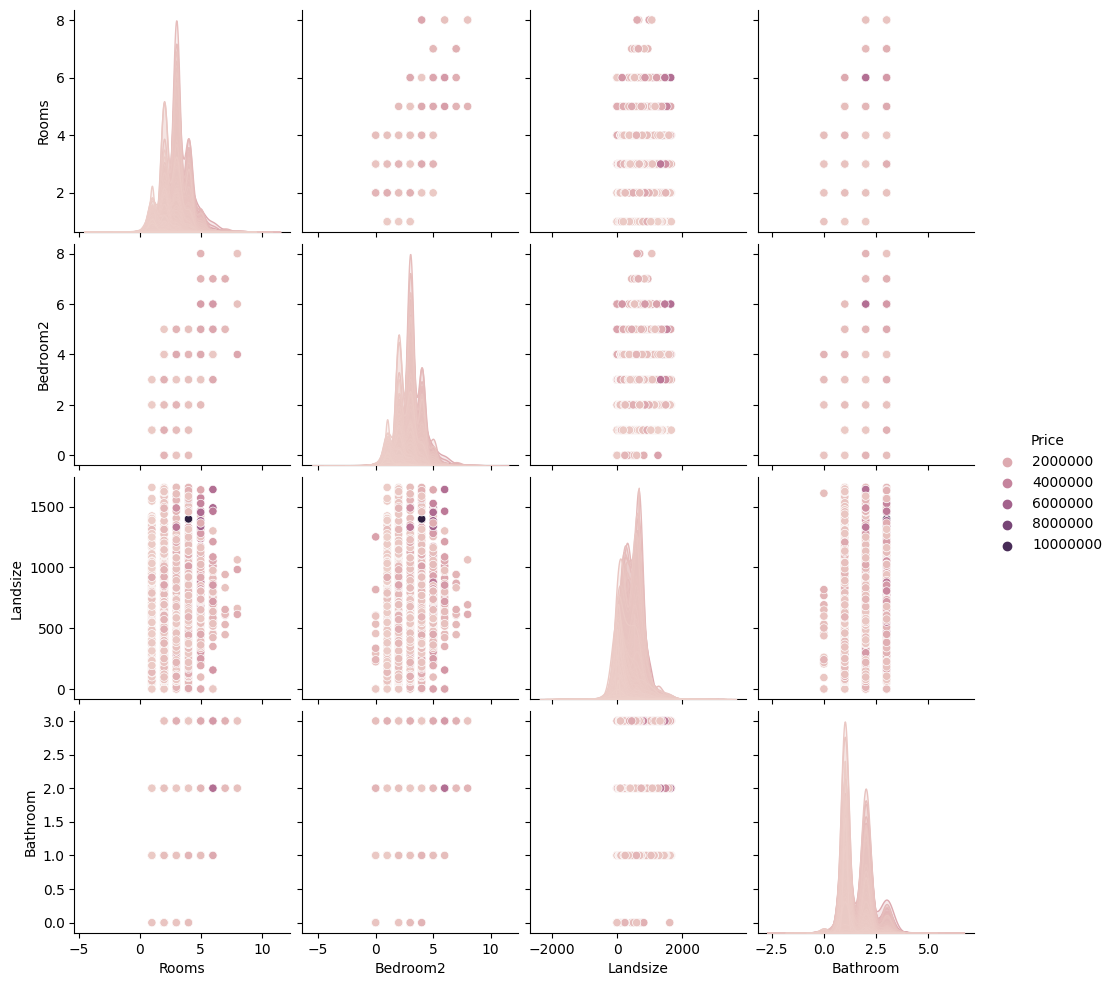

In [124]:
sns.pairplot(full_copy[['Rooms', 'Bedroom2', 'Price', 'Landsize', 'Bathroom']], hue = 'Price')
plt.show()

Bunları yaptığımıza göre şimdi artık diğer nümerik değişkenler için ortalama değer atama zamanımız geldi. Bunun için yeniden boş değişkenlere bakıyorum.

In [128]:
full_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4720
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea     10306
YearBuilt         8825
CouncilArea          0
Lattitude           26
Longtitude          26
Regionname           0
Propertycount        0
dtype: int64

Görünürde fazla birşey bulunmuyor. Ancak tablomuzda kategorik değişkenler de mevcut. Bu yüzden One Hot Encoder fonksiyonu kullanacağım.

In [131]:
def one_hot_encoder(full_copy, drop_first=True):

    ohe_cols = [
        col for col in full_copy.columns
        if full_copy[col].dtype == 'object' and 2 < full_copy[col].nunique() <= 12
    ]

    full_copy = pd.get_dummies(full_copy, columns=ohe_cols, drop_first=drop_first)

    return full_copy

full_copy = one_hot_encoder(full_copy, drop_first=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in full_copy.select_dtypes(include=['object']):
    full_copy[col] = label_encoder.fit_transform(full_copy[col])

full_copy.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,Type_t,Type_u,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,18289,2,NaN,130,58,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,31,-37.80,145.00,4019.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,20298,2,1480000.00,26,60,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,31,-37.80,145.00,4019.00,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,9271,2,1035000.00,26,63,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,4019.00,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,6001,3,NaN,259,63,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,31,-37.81,145.01,4019.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,15470,3,1465000.00,26,64,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,4019.00,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
